<a href="https://colab.research.google.com/github/SubhadipSen/Mobile-price-range-prediction/blob/main/My_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.**
###**The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**
#**Data Description -**
**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega Bytes

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last when you are

**Three_g -** Has 3G or not

**Touch_screen -** Has touch screen or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning) 
import warnings 
warnings. simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
mobile_price_prediction=pd.read_csv("/content/drive/MyDrive/data_mobile_price_range.csv")

In [ ]:
mobile_price_prediction.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


###Checking Missing Values in our dataset

#Chi-Square Test for Independence

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
catagory=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
p_value=[]
is_significant_relationship=[]

for i in catagory:
     
    data=pd.crosstab(mobile_price_prediction[i], mobile_price_prediction['price_range'], margins=True)
    stat, p, dof, expected = chi2_contingency(data)
    p_value.append(p)
    if p<=0.05:
      is_significant_relationship.append('YES')
    else:
      is_significant_relationship.append('NO')


In [ ]:
chi2_table=pd.DataFrame(list(zip(catagory,p_value,is_significant_relationship)),columns=['catagory','p_value','is_significant_relationship'])

In [ ]:
chi2_table

,catagory,p_value,is_significant_relationship
0,blue,0.993778,NO
1,dual_sim,0.995712,NO
2,four_g,0.922567,NO
3,n_cores,0.941549,NO
4,three_g,0.994611,NO
5,touch_screen,0.867772,NO
6,wifi,0.999004,NO


# Feature importance using **variance inflation factor**

In [ ]:
features='+'.join(mobile_price_prediction.columns.difference(['price_range']))

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
a,b=dmatrices(formula_like='price_range~'+features,data=mobile_price_prediction,return_type='dataframe')
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['Features']=b.columns

In [ ]:
vif

,VIF Factor,Features
0,73.921098,Intercept
1,1.009945,battery_power
2,1.011342,blue
3,1.006025,clock_speed
4,1.011555,dual_sim
5,1.718987,fc
6,1.528509,four_g
7,1.009274,int_memory
8,1.006385,m_dep
9,1.004548,mobile_wt


In [ ]:
mobile_price_prediction[mobile_price_prediction.columns.difference(['price_range'])]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
train_X,test_X,train_y,test_y = train_test_split(mobile_price_prediction[mobile_price_prediction.columns.difference(['price_range'])],
                                                 mobile_price_prediction['price_range'],
                                                test_size=0.3,random_state=0)

In [ ]:
train_X.shape

(1400, 20)

#standardizing train set

In [ ]:
import statsmodels.api as sm
train_X_stats=sm.add_constant(train_X)
test_X_stats=sm.add_constant(test_X)
lm=sm.OLS(train_y,train_X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            price_range   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1660.
Date:                Sun, 05 Sep 2021   Prob (F-statistic):                        0.00
Time:                        05:36:40   Log-Likelihood:                         -593.23
No. Observations:                1400   AIC:                                      1226.
Df Residuals:                    1380   BIC:                                      1331.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
battery_power     0.0004   2.16e-05     17.779      0.000       0.000       0.000
blue             -0.0378      0.020     -1.901      0.057      -0.077       0.001
clock_speed      -0.0676      0.012     -5.700      0.000      -0.091      -0.044
dual_sim         -0.0848      0.020     -4.270      0.000      -0.124      -0.046
fc                0.0012      0.003      0.397      0.692      -0.005       0.007
four_g           -0.0137      0.025     -0.556      0.578      -0.062       0.035
int_memory       -0.0010      0.001     -1.943      0.052      -0.002    1.01e-05
m_dep            -0.1211      0.034     -3.548      0.000      -0.188      -0.054
mobile_wt        -0.0033      0.000    -13.245      0.000      -0.004      -0.003
n_cores          -0.0146      0.004     -3.390      0.001      -0.023      -0.006
pc               -0.0071      0.002     -3.347      0.001      -0.011      -0.003
px_height         0.0003   2.61e-05     11.358      0.000       0.000       0.000
px_width          0.0001   2.58e-05      5.510      0.000    9.17e-05       0.000
ram               0.0009   9.11e-06     99.868      0.000       0.001       0.001
sc_h             -0.0189      0.003     -7.156      0.000      -0.024      -0.014
sc_w              0.0044      0.003      1.677      0.094      -0.001       0.010
talk_time        -0.0078      0.002     -4.414      0.000      -0.011      -0.004
three_g          -0.0696      0.029     -2.439      0.015      -0.126      -0.014
touch_screen     -0.0556      0.020     -2.795      0.005      -0.095      -0.017
wifi             -0.0585      0.020     -2.937      0.003      -0.098      -0.019
==============================================================================
Omnibus:                       14.688   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.288
Skew:                           0.079   Prob(JB):                      0.00583
Kurtosis:                       2.611   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#linear regression for predicting the labels 

In [ ]:
test_pred=lm.predict(test_X)
train_pred=lm.predict(train_X)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 0.13409654500137336
MSE Train: 0.13664019175121214


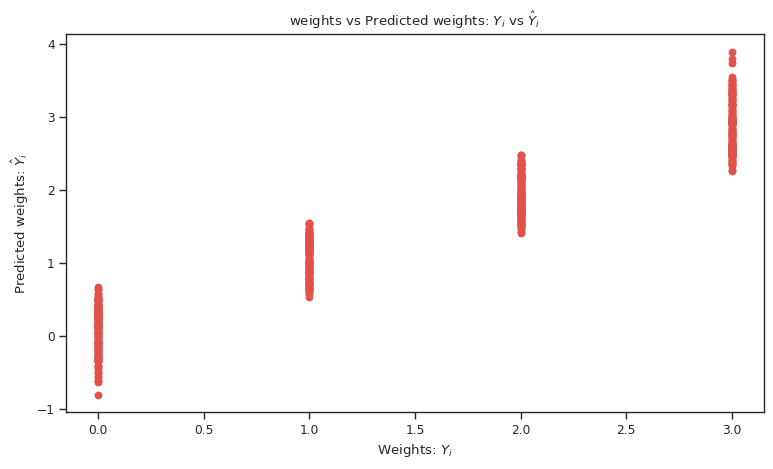

In [ ]:
# Apply Linear regression
lm = LinearRegression()
lm.fit(train_X, train_y)

#Prediction
Y_pred = lm.predict(test_X)


# Scatter plot Y_test vs Y_predicted
plt.figure(figsize=(9, 5))
plt.scatter(test_y, Y_pred)

plt.xlabel("Weights: $Y_i$")
plt.ylabel("Predicted weights: $\hat{Y}_i$")
plt.title("weights vs Predicted weights: $Y_i$ vs $\hat{Y}_i$")
plt.show()

checking the normality of the residuals

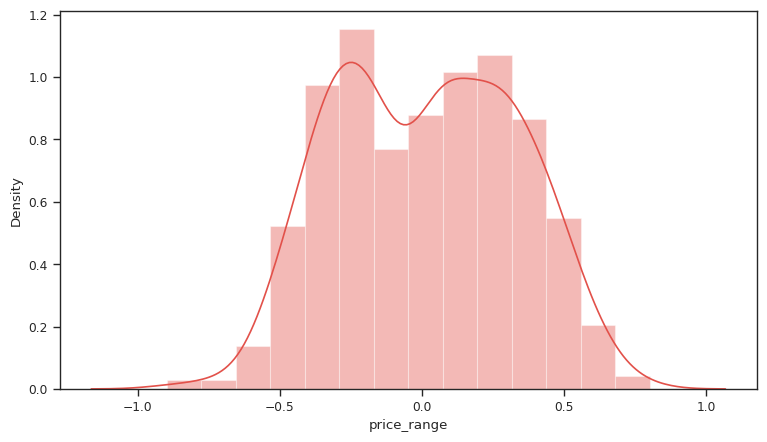

In [ ]:
delta_y = test_y - Y_pred
plt.figure(figsize=(9, 5))
sns.distplot(delta_y)

Checking homoscadicity

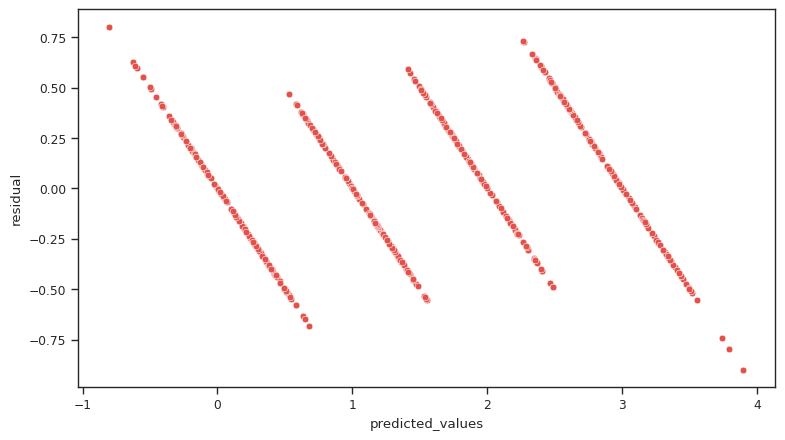

In [ ]:
data_plot = pd.DataFrame({"predicted_values":Y_pred, "residual":delta_y})
plt.figure(figsize=(9, 5))
sns.scatterplot(x = "predicted_values", y = "residual", data=data_plot)
plt.show()


#Decision Trees

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(mobile_price_prediction[mobile_price_prediction.columns.difference(['price_range'])],
                                                 mobile_price_prediction['price_range'],
                                                test_size=0.3,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import GridSearchCV
price_classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
price_classifier = GridSearchCV(price_classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
price_classifier.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                  

In [ ]:
price_classifier.best_params_

{'max_depth': 9, 'max_leaf_nodes': 23}

In [ ]:
price_classifier = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=23, max_depth= 7)
price_classifier.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=23,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_test_prediction= price_classifier.predict(test_X)

In [ ]:
y_train_prediction = price_classifier.predict(train_X)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
reportDtree = classification_report(test_y, y_test_prediction, output_dict = True)

crLReg = pd.DataFrame(reportDtree).transpose()

crLReg

,precision,recall,f1-score,support
0,0.926667,0.920530,0.923588,151.000000
1,0.796875,0.755556,0.775665,135.000000
2,0.751773,0.701987,0.726027,151.000000
3,0.828729,0.920245,0.872093,163.000000
accuracy,0.828333,0.828333,0.828333,0.828333
macro avg,0.826011,0.824579,0.824343,600.000000
weighted avg,0.826842,0.828333,0.826597,600.000000


In [ ]:
reportDtree = classification_report(train_y, y_train_prediction, output_dict = True)

crLReg = pd.DataFrame(reportDtree).transpose()

crLReg

,precision,recall,f1-score,support
0,0.931624,0.936963,0.934286,349.000000
1,0.879310,0.838356,0.858345,365.000000
2,0.858824,0.836676,0.847605,349.000000
3,0.897507,0.961424,0.928367,337.000000
accuracy,0.892143,0.892143,0.892143,0.892143
macro avg,0.891816,0.893355,0.892151,1400.000000
weighted avg,0.891624,0.892143,0.891454,1400.000000


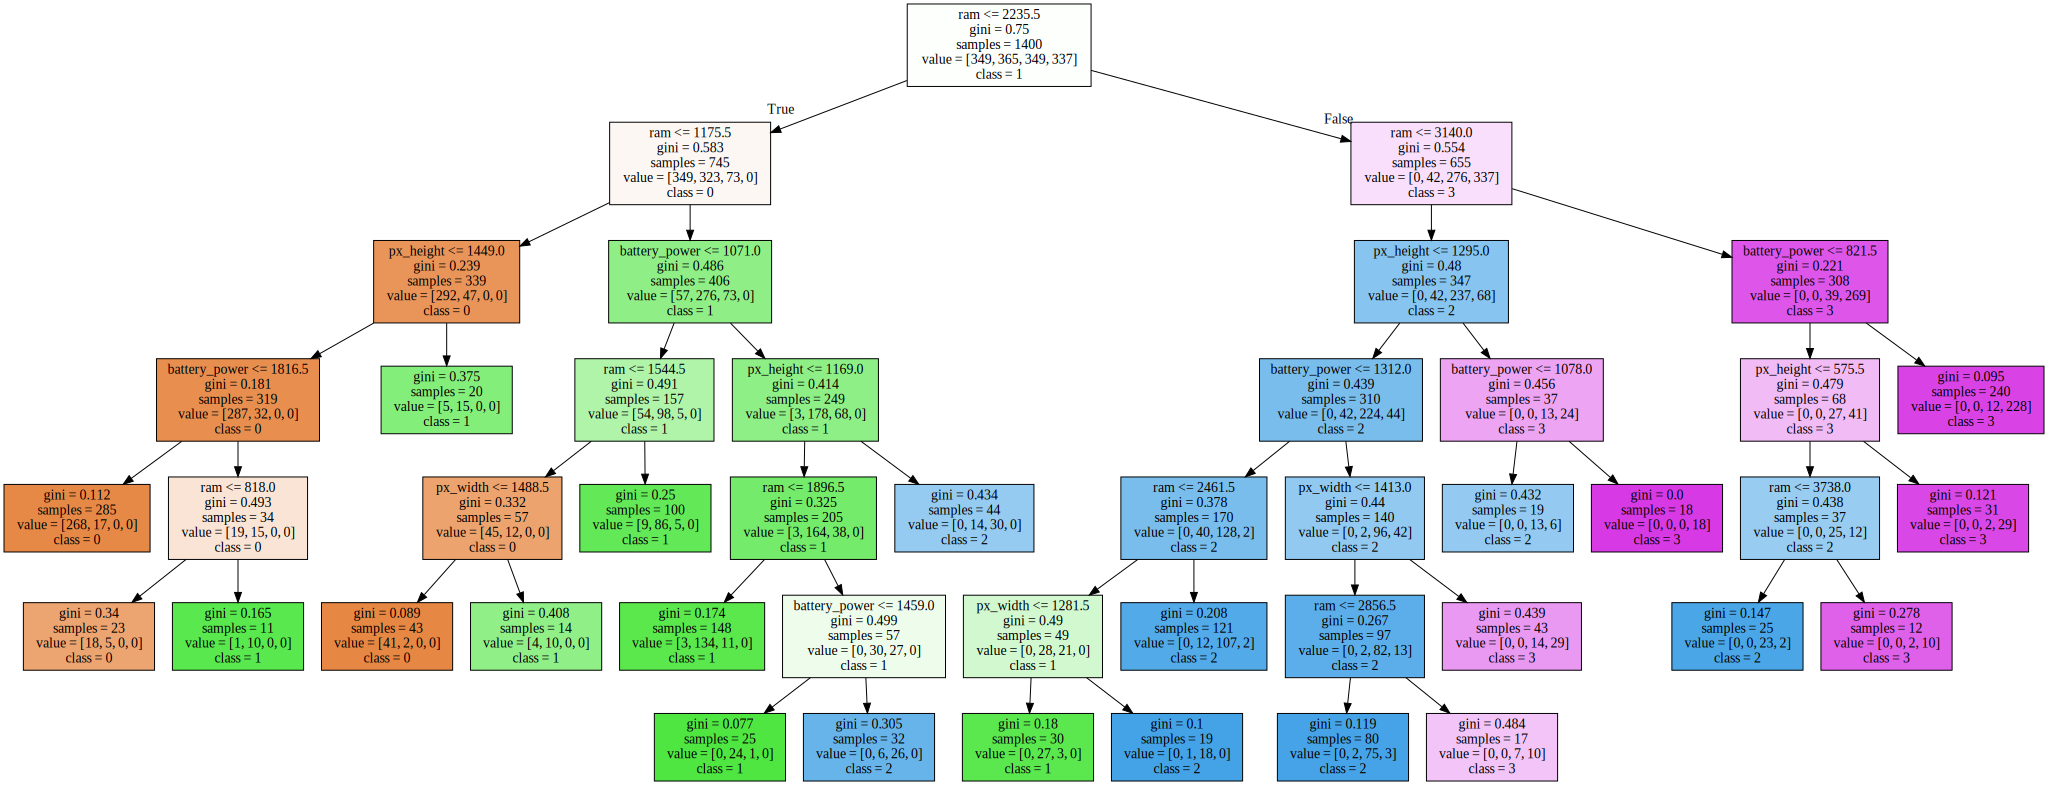

In [ ]:
graph = Source(tree.export_graphviz(price_classifier, out_file=None
   , feature_names=train_X.columns, class_names=['0', '1','2','3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

#Knn Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(mobile_price_prediction[mobile_price_prediction.columns.difference(['price_range'])],
                                                 mobile_price_prediction['price_range'],
                                                test_size=0.3,random_state=0)

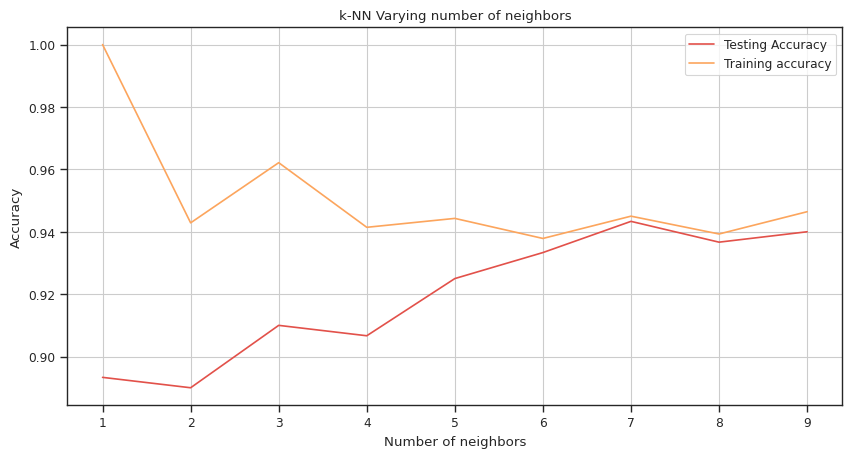

In [ ]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(train_X, train_y)
    train_accuracy[i] = knn_clf.score(train_X, train_y)
    test_accuracy[i] = knn_clf.score(test_X, test_y) 

plt.figure(figsize= (10,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 7)
knn_clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_test_prediction = knn_clf.predict(test_X)
y_train_prediction = knn_clf.predict(train_X)

In [ ]:
reportKnn = classification_report(test_y, y_test_prediction, output_dict = True)
crLReg = pd.DataFrame(reportKnn).transpose()
crLReg

,precision,recall,f1-score,support
0,0.967742,0.993377,0.980392,151.000000
1,0.940299,0.933333,0.936803,135.000000
2,0.912752,0.900662,0.906667,151.000000
3,0.950617,0.944785,0.947692,163.000000
accuracy,0.943333,0.943333,0.943333,0.943333
macro avg,0.942852,0.943040,0.942889,600.000000
weighted avg,0.943076,0.943333,0.943147,600.000000


In [ ]:
reportKnn = classification_report(train_y, y_train_prediction, output_dict = True)
crLReg = pd.DataFrame(reportKnn).transpose()
crLReg

,precision,recall,f1-score,support
0,0.968750,0.977077,0.972896,349.000
1,0.927419,0.945205,0.936228,365.000
2,0.919308,0.914040,0.916667,349.000
3,0.966565,0.943620,0.954955,337.000
accuracy,0.945000,0.945000,0.945000,0.945
macro avg,0.945511,0.944986,0.945186,1400.000
weighted avg,0.945124,0.945000,0.945000,1400.000


#XGBoost

In [ ]:
from xgboost import XGBClassifier 

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
param={
    'learning_rate':[0.01, 0.025, 0.05, 0.75, 0.10],
    'max_depth':[3,4,5],
    'n_estimators':[25,50,75,100,150,200],
    'min_child_weight':[1,2,3,4]
}
grid_search = GridSearchCV(xgb_model, param,cv=5)
grid_search.fit(train_X,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.75, 0.1],
                         'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 2, 3,

In [ ]:
grid_search.best_params_

{'learning_rate': 0.75,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 75}

In [ ]:
xgb_model=XGBClassifier(learning_rate= 0.75,
 max_depth = 4,
 min_child_weight = 3,
 n_estimators = 75)
xgb_model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.75, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_test_prediction = xgb_model.predict(test_X)
y_train_prediction = xgb_model.predict(train_X)

In [ ]:
reportxgb = classification_report(test_y, y_test_prediction, output_dict = True)
crLReg = pd.DataFrame(reportxgb).transpose()
crLReg

,precision,recall,f1-score,support
0,0.966216,0.947020,0.956522,151.00
1,0.872611,0.938356,0.904290,146.00
2,0.906475,0.851351,0.878049,148.00
3,0.935897,0.941935,0.938907,155.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.920300,0.919666,0.919442,600.00
weighted avg,0.920870,0.920000,0.919905,600.00


In [ ]:
reportxgb = classification_report(train_y, y_train_prediction, output_dict = True)
crLReg = pd.DataFrame(reportxgb).transpose()
crLReg

,precision,recall,f1-score,support
0,1.0,1.0,1.0,349.0
1,1.0,1.0,1.0,354.0
2,1.0,1.0,1.0,352.0
3,1.0,1.0,1.0,345.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1400.0
weighted avg,1.0,1.0,1.0,1400.0


In [ ]:
features = train_X.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

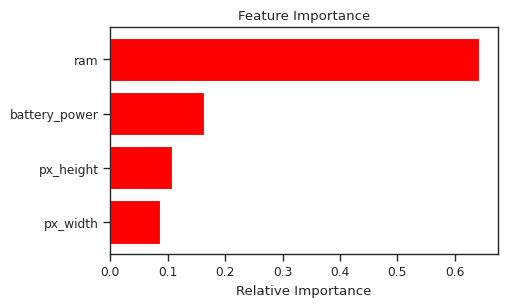

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from xgboost import plot_importance

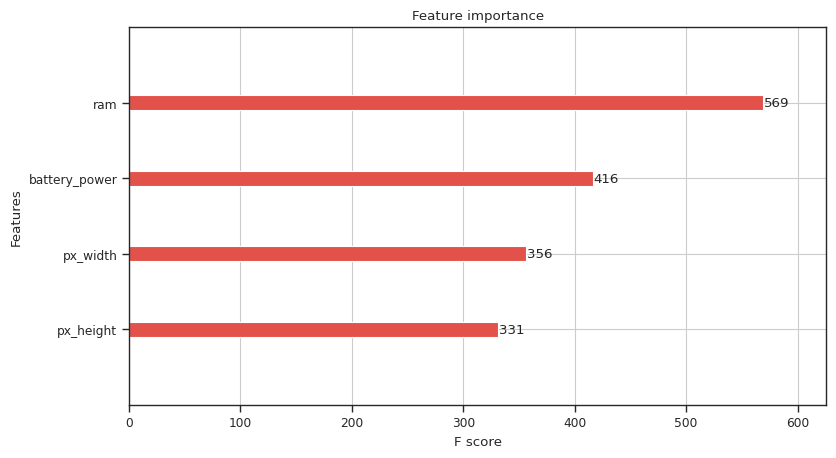

In [ ]:
plt.rcParams["figure.figsize"] = (9,5)
plot_importance(xgb_model,)
plt.show()

In [ ]:
y= df.price_range
X = df[['ram', 'px_height', 'px_width', 'battery_power']]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
xgb_model=XGBClassifier(learning_rate= 0.75,
 max_depth = 4,
 min_child_weight = 3,
 n_estimators = 75)
xgb_model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.75, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_test_prediction = xgb_model.predict(test_X)
y_train_prediction = xgb_model.predict(train_X)

In [ ]:
reportxgb = classification_report(test_y, y_test_prediction, output_dict = True)
crLReg = pd.DataFrame(reportxgb).transpose()
crLReg

,precision,recall,f1-score,support
0,0.966216,0.947020,0.956522,151.00
1,0.872611,0.938356,0.904290,146.00
2,0.906475,0.851351,0.878049,148.00
3,0.935897,0.941935,0.938907,155.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.920300,0.919666,0.919442,600.00
weighted avg,0.920870,0.920000,0.919905,600.00


In [ ]:
reportxgb = classification_report(train_y, y_train_prediction, output_dict = True)
crLReg = pd.DataFrame(reportxgb).transpose()
crLReg

,precision,recall,f1-score,support
0,1.0,1.0,1.0,349.0
1,1.0,1.0,1.0,354.0
2,1.0,1.0,1.0,352.0
3,1.0,1.0,1.0,345.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1400.0
weighted avg,1.0,1.0,1.0,1400.0


#Removing multicollinear variables

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(mobile_price_prediction[mobile_price_prediction.columns.difference(['price_range','sc_h','m_dep','talk_time','sc_w'])],
                                                 mobile_price_prediction['price_range'],
                                                test_size=0.3,random_state=0)
import statsmodels.api as sm
train_X=sm.add_constant(train_X)
test_X=sm.add_constant(test_X)
lm=sm.OLS(train_y,train_X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     950.8
Date:                Sun, 05 Sep 2021   Prob (F-statistic):               0.00
Time:                        05:47:20   Log-Likelihood:                -391.77
No. Observations:                1400   AIC:                             817.5
Df Residuals:                    1383   BIC:                             906.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6032      0.066    -24.455      0.000      -1.732      -1.475
battery_power     0.0005   1.95e-05     26.192      0.000       0.000       0.001
blue              0.0094      0.017      0.542      0.588      -0.025       0.043
clock_speed      -0.0073      0.011     -0.686      0.493      -0.028       0.014
dual_sim         -0.0283      0.017     -1.631      0.103      -0.062       0.006
fc                0.0021      0.003      0.805      0.421      -0.003       0.007
four_g           -0.0128      0.021     -0.601      0.548      -0.055       0.029
int_memory        0.0011      0.000      2.394      0.017       0.000       0.002
mobile_wt        -0.0008      0.000     -3.113      0.002      -0.001      -0.000
n_cores           0.0038      0.004      0.991      0.322      -0.004       0.011
pc               -0.0023      0.002     -1.228      0.220      -0.006       0.001
px_height         0.0003   2.26e-05     12.847      0.000       0.000       0.000
px_width          0.0003   2.33e-05     12.269      0.000       0.000       0.000
ram               0.0009   8.07e-06    117.409      0.000       0.001       0.001
three_g           0.0247      0.025      0.986      0.324      -0.024       0.074
touch_screen     -0.0111      0.017     -0.639      0.523      -0.045       0.023
wifi             -0.0197      0.017     -1.138      0.255      -0.054       0.014
==============================================================================
Omnibus:                       58.311   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.385
Skew:                           0.035   Prob(JB):                     3.07e-06
Kurtosis:                       2.344   Cond. No.                     2.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 4.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491646 sha256=fa7e8a0768e3b2a8cc8ec61d87dc93d08c649ada8e05bfd943bdcecd6304e5e4
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
